In [1]:
# general settings
from warnings import filterwarnings; filterwarnings('ignore')
from numpy.random import seed; seed(42)
from keras.utils import set_random_seed; set_random_seed(42)

In [2]:
# standard imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# loading dataset
df = pd.read_excel('/content/mall_customers_dataset.xlsx')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# selecting necessary features
df = df.drop(columns=['CustomerID'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
# getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
# getting stats summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [7]:
# detecting duplicates
df.duplicated().sum()

0

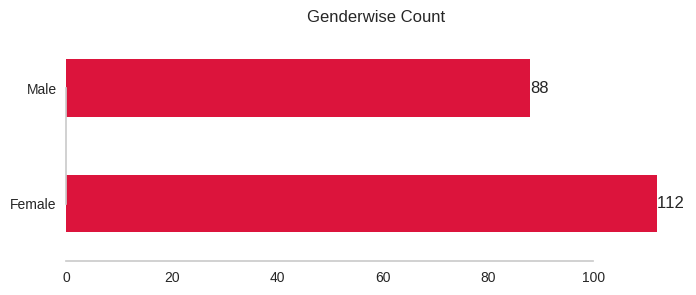

In [8]:
# 'Gender' value count
data = df['Gender'].value_counts().plot.barh(figsize=(8,3), color='crimson', title='Genderwise Count', grid=False)
plt.bar_label(data.containers[0])
sns.despine(trim=True);

In [9]:
# encoding 'Gender'
df['Gender'] = df['Gender'].factorize()[0]
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


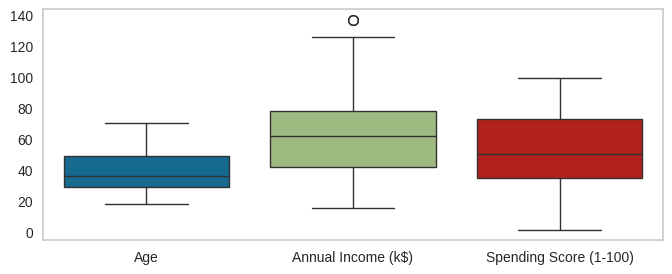

In [10]:
# detecting outliers
plt.figure(figsize=(8,3))
plt.grid(False)
sns.boxplot(data=df.drop(columns='Gender', axis=1))
plt.show()

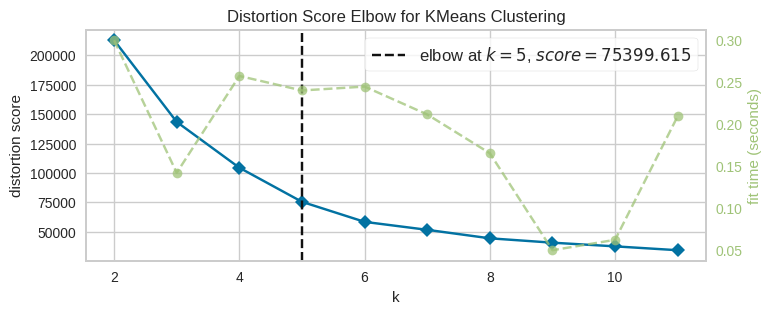

In [11]:
# employing elbow method
plt.figure(figsize=(8,3))
visual = KElbowVisualizer(estimator=KMeans(), k=(2,12))
visual.fit(df)
visual.show();

In [12]:
# model building
model = KMeans(n_clusters=5, random_state=42)
model.fit(df)

KMeans(n_clusters=5, random_state=42)

In [13]:
# model evaluation
print("Silhouette Score:", (silhouette_score(df, model.predict(df)) * 100).round(2))

Silhouette Score: 44.42


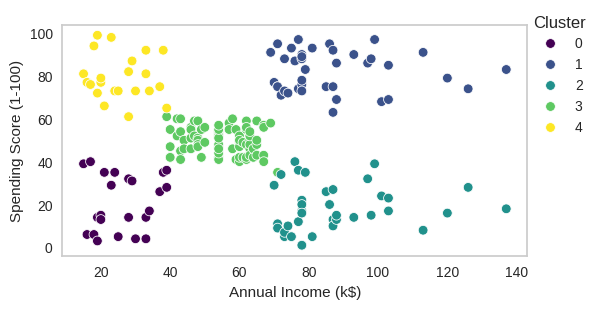

In [14]:
# visualizing clusters
df['cluster'] = model.labels_
plt.figure(figsize=(6,3))
plt.grid(False)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='viridis')
plt.legend(title='Cluster', loc=(1, 0.5))
plt.show()